In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pdb

## Temp  result

<Axes: >

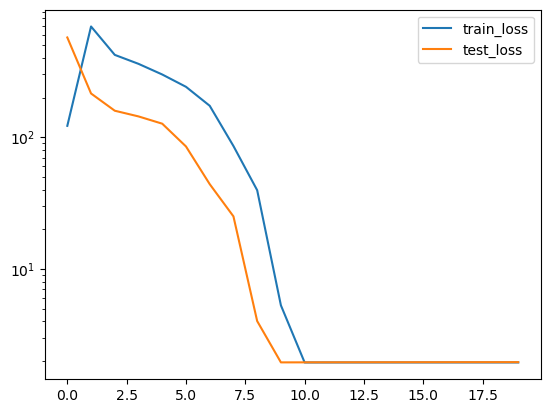

In [23]:
result_file_temp = 'results/temp_exp/result.csv'
result_df_temp = pd.read_csv(result_file_temp)
result_df_temp

result_df_temp[:20].plot(y = ['train_loss', 'test_loss'], logy = True)


Text(0.5, 1.0, 'Pre-processed')

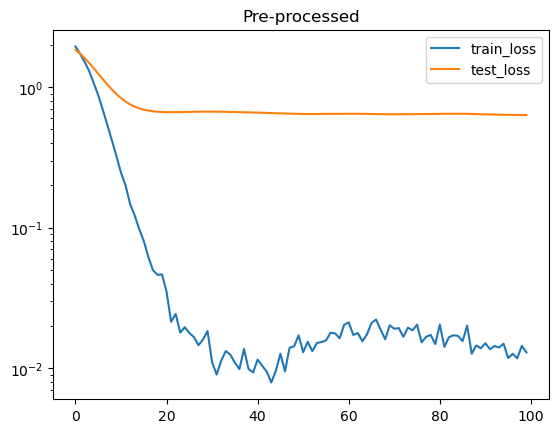

In [6]:
result_file_pp = 'results/exp_cora_vec1_v1_pp/result.csv'
result_df_pp = pd.read_csv(result_file_pp)
result_df_pp

result_df_pp.plot(y=['train_loss', 'test_loss'], logy=True)
plt.title('Pre-processed')


Text(0.5, 1.0, 'No Pre-process')

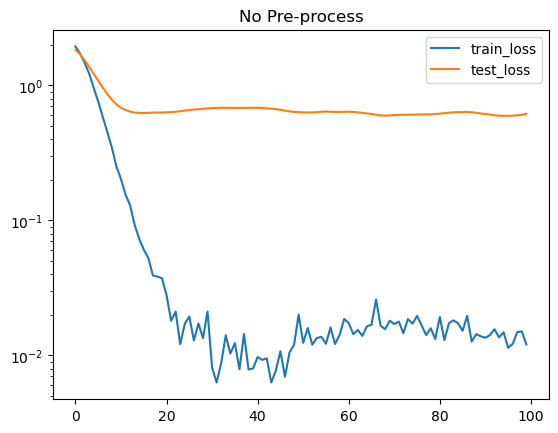

In [7]:
result_file_npp = 'results/exp_cora_vec1_v1_nopp/result.csv'
result_df_npp = pd.read_csv(result_file_npp)
result_df_npp

result_df_npp.plot(y=['train_loss', 'test_loss'], logy=True)
plt.title('No Pre-process')


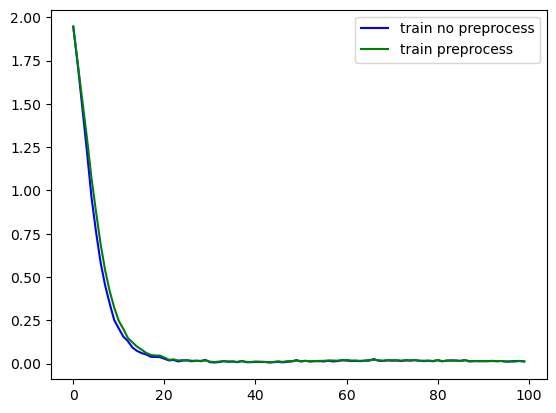

In [8]:
train_loss_pp = result_df_pp['train_loss']
train_loss_npp = result_df_npp['train_loss']

plt.plot(train_loss_npp, c='b', label='train no preprocess')
plt.plot(train_loss_pp, c='g', label='train preprocess')
plt.legend()
plt.show()

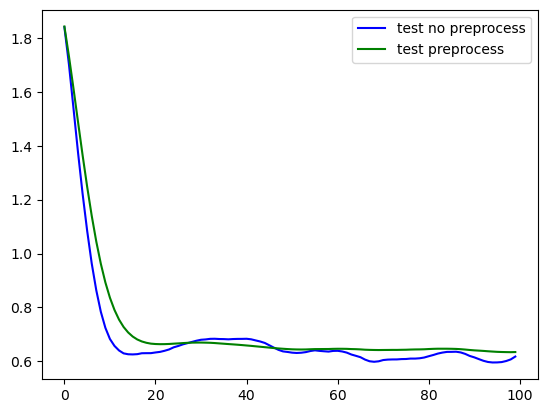

In [9]:
test_loss_pp = result_df_pp['test_loss']
test_loss_npp = result_df_npp['test_loss']


plt.plot(test_loss_npp, c='b', label='test no preprocess')
plt.plot(test_loss_pp, c='g', label='test preprocess')
plt.legend()
plt.show()

## With Multiple Runs

In [4]:
result_df = pd.read_csv('results/exp_cora_vec1_v3/result.csv')
result_df 

,random_seed,pp,epoch,train_loss,train_acc,test_loss,test_acc
0,106,True,0,1.945066,0.135714,1.839240,0.665
1,106,True,1,1.743763,0.914286,1.733057,0.746
2,106,True,2,1.541807,0.942857,1.616176,0.770
3,106,True,3,1.326417,0.964286,1.496212,0.767
4,106,True,4,1.085084,0.978571,1.377603,0.769
...,...,...,...,...,...,...,...
1995,105,False,95,0.015391,1.000000,0.622690,0.801
1996,105,False,96,0.016898,1.000000,0.620763,0.799
1997,105,False,97,0.016470,1.000000,0.620111,0.797
1998,105,False,98,0.020705,1.000000,0.620069,0.804


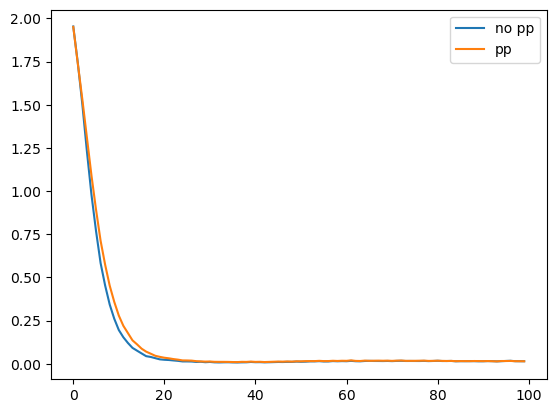

In [5]:
mean_df = result_df.groupby(['pp', 'epoch']).mean()

# mean_df.plot(x='epoch', y=['train_loss'])
nopp_train_loss = []
pp_train_loss = []
for grp_id, grp_val in mean_df.iterrows():
    if grp_id[0] == False:
        nopp_train_loss.append(grp_val['train_loss'])
    else:
        pp_train_loss.append(grp_val['train_loss'])

plt.plot(nopp_train_loss, label= 'no pp')
plt.plot(pp_train_loss, label= 'pp')
plt.legend()
plt.show()

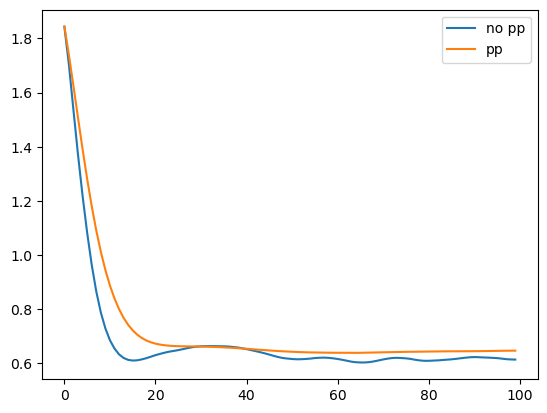

In [6]:
mean_df = result_df.groupby(['pp', 'epoch']).mean()

# mean_df.plot(x='epoch', y=['train_loss'])
nopp_test_loss = []
pp_test_loss = []
for grp_id, grp_val in mean_df.iterrows():
    if grp_id[0] == False:
        nopp_test_loss.append(grp_val['test_loss'])
    else:
        pp_test_loss.append(grp_val['test_loss'])

plt.plot(nopp_test_loss, label= 'no pp')
plt.plot(pp_test_loss, label= 'pp')
plt.legend()
plt.show()

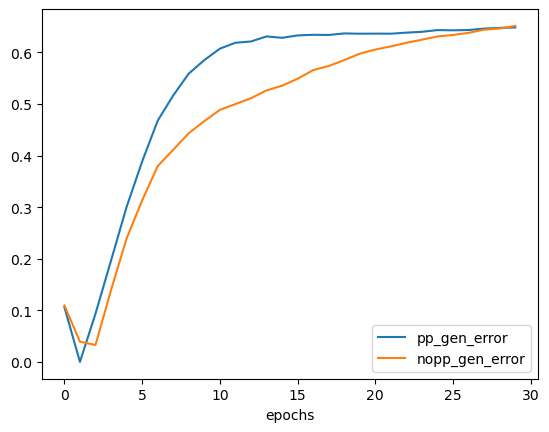

In [7]:
plt.plot(np.abs(np.array(pp_test_loss) - np.array(pp_train_loss))[:30], label='pp_gen_error')
plt.plot(np.abs(np.array(nopp_test_loss) - np.array(nopp_train_loss))[:30], label='nopp_gen_error')
plt.xlabel('epochs')
plt.legend()
plt.show()

## EXP2
|Property       | Value   |
|---------------|--------|
| Dataset       | Cora    |
| Preprocessing | made features orthogonal to $\sqrt{d_i + 1}$ |
| Weight Initialization | None |



In [2]:
result_df = pd.read_csv('results/exp_cora_vec_deg_v1.2/result.csv')
result_df

,random_seed,pp,epoch,train_loss,train_acc,test_loss,test_acc
0,104,True,0,1.947788,0.128571,1.831436,0.671
1,104,True,1,1.727290,0.878571,1.721048,0.735
2,104,True,2,1.511812,0.957143,1.601563,0.759
3,104,True,3,1.278968,0.971429,1.480019,0.768
4,104,True,4,1.052184,0.985714,1.361079,0.768
...,...,...,...,...,...,...,...
1995,106,False,95,0.018348,1.000000,0.624778,0.807
1996,106,False,96,0.018265,1.000000,0.624283,0.805
1997,106,False,97,0.015501,1.000000,0.620686,0.804
1998,106,False,98,0.015658,1.000000,0.618291,0.806


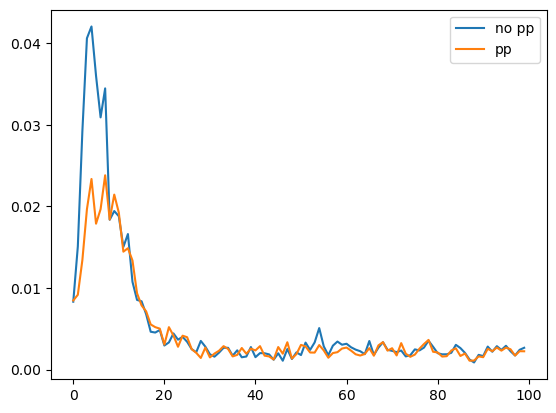

In [6]:
mean_df = result_df.groupby(['pp', 'epoch']).std()

# mean_df.plot(x='epoch', y=['train_loss'])
nopp_train_loss = []
pp_train_loss = []
for grp_id, grp_val in mean_df.iterrows():
    if grp_id[0] == False:
        nopp_train_loss.append(grp_val['train_loss'])
    else:
        pp_train_loss.append(grp_val['train_loss'])

plt.plot(nopp_train_loss, label= 'no pp')
plt.plot(pp_train_loss, label= 'pp')
plt.legend()
plt.show()

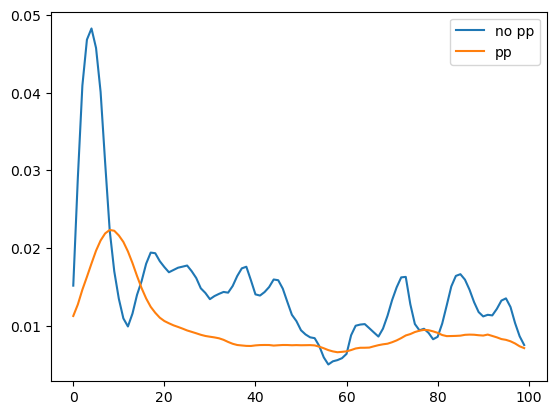

In [7]:
mean_df = result_df.groupby(['pp', 'epoch']).std()

# mean_df.plot(x='epoch', y=['train_loss'])
nopp_test_loss = []
pp_test_loss = []
for grp_id, grp_val in mean_df.iterrows():
    if grp_id[0] == False:
        nopp_test_loss.append(grp_val['test_loss'])
    else:
        pp_test_loss.append(grp_val['test_loss'])

plt.plot(nopp_test_loss, label= 'no pp')
plt.plot(pp_test_loss, label= 'pp')
plt.legend()
plt.show()

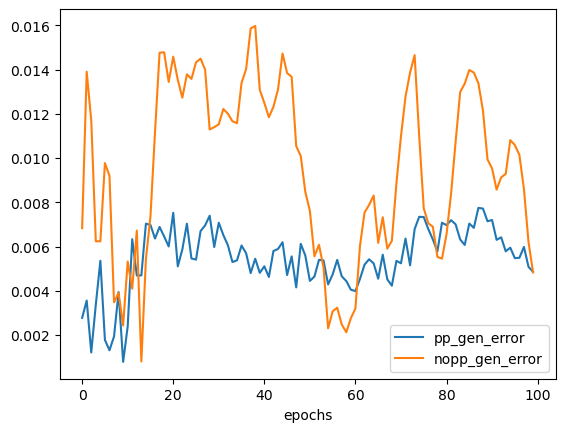

In [8]:
plt.plot(np.abs(np.array(pp_test_loss) - np.array(pp_train_loss))[:], label='pp_gen_error')
plt.plot(np.abs(np.array(nopp_test_loss) - np.array(nopp_train_loss))[:], label='nopp_gen_error')
plt.xlabel('epochs')
plt.legend()
plt.show()